# Accessing and Plotting Data from Pagan Lab NWB File

This notebook demonstrates how to access and visualize behavioral data stored in an NWB file generated by the Pagan Lab NWB conversion pipeline.

## Load the NWB file

This section demonstrates how to access an NWB file using `pynwb.NWBHDF5IO`.

In [16]:
from pynwb import NWBHDF5IO

nwbfile_path = "/Volumes/T9/data/Pagan/raw/sub-H7015_ses-250516a.nwb" # Update this path as needed"

io = NWBHDF5IO(nwbfile_path, "r")
nwbfile = io.read()

## Accessing the task metadata

The task-related general metadata is stored in a `Task` object which can be accessed as `nwbfile.lab_meta_data["task"]`.

The `EventTypesTable` is a column-based table to store the type of events that occur during the task (e.g. port poke from the animal), one type per row.
This table can be accessed as `nwbfile.lab_meta_data["task"].event_types`.


In [17]:
nwbfile.lab_meta_data["task"].event_types[:]

,event_name
id,
0,C
1,L
2,R


The `ActionTypesTable` is a column-based table to store the type of actions that occur during the task (e.g. sound output from the acquisition system), one type per row.
This table can be accessed as `nwbfile.lab_meta_data["task"].action_types`.

In [18]:
nwbfile.lab_meta_data["task"].action_types[:]

,action_name
id,
0,direct_reward
1,stimulatorwave
2,cpoke_timer


The `StateTypesTable` is a column-based table to store the type of states that occur during the task (e.g. while the animal is waiting for reward), one type per row.
This table can be accessed as `nwbfile.lab_meta_data["task"].state_types`.

In [19]:
nwbfile.lab_meta_data["task"].state_types[:]

,state_name
id,
0,state_0
1,sending_trialnum
2,check_next_trial_ready
3,wait_for_cpoke
4,wait_for_cpoke_wait2
5,wait_for_cpoke_dir
6,wait_for_cpoke_freq
7,wait_for_cpoke_bis
8,nic_prestim


The arguments for the task is stored in a `TaskArgumentsTable` which can be accessed as `nwbfile.lab_meta_data["task"].task_arguments`.


In [20]:
nwbfile.lab_meta_data["task"].task_arguments[:]

,argument_name,argument_description,expression,expression_type,output_type
id,,,,,
0,ProtocolsSection_n_done_trials,no description,909,integer,numeric
1,ProtocolsSection_n_started_trials,no description,910,integer,numeric
2,ProtocolsSection_n_completed_trials,no description,909,integer,numeric
3,TaskSwitch6_sessid,no description,-1,integer,numeric
4,SavingSection_data_file,no description,C:\ratter\SoloData\Data\Nuria\H7015\data_@Task...,string,text
...,...,...,...,...,...
350,StimulusSection_incoherent_trial,no description,0,integer,numeric
351,StimulusSection_total_error_delay,no description,4.841086071914507,float,numeric
352,StimulusSection_total_water_multiplier,no description,0.14027046893372286,float,numeric


## Accessing the behavioral data

The `TaskRecording` object stores the data for events, states, and actions that occured during the task. The `TaskRecording` is added as acquisition which can be accessed as `nwbfile.acquisition["task_recording"]`.

The `EventsTable` is a column-based table to store the information about the events (e.g. poke times), one event per row. This table can be accessed as `nwbfile.acquisition["task_recording"].events`.

In [21]:
import pandas as pd

pd.merge(
    nwbfile.acquisition["task_recording"].events[:],
    nwbfile.lab_meta_data["task"].event_types[:],
    left_on="event_type",
    right_on="id",
)

,timestamp,event_type,value,duration,event_name
0,61.2042,0,In,1.4845,C
1,36.9975,1,In,0.0282,L
2,37.0930,1,In,0.0490,L
3,37.2777,1,In,0.0499,L
4,64.2236,1,In,0.0708,L
...,...,...,...,...,...
1229,854.5893,2,In,0.0497,R
1230,854.7787,2,In,0.0345,R
1231,854.9129,2,In,0.0612,R
1232,855.0813,2,In,0.0466,R


The `StatesTable` is a column-based table to store the information about the states (e.g. the duration while nose is in center port). This table can be accessed as `nwbfile.acquisition["task_recording"].states`.

In [22]:
pd.merge(
    nwbfile.acquisition["task_recording"].states[:],
    nwbfile.lab_meta_data["task"].state_types[:],
    left_on="state_type",
    right_on="id",
)

,start_time,stop_time,state_type,state_name
0,32.3360,67.1255,0,state_0
1,67.1255,67.1255,2,check_next_trial_ready
2,32.3360,NaN,3,wait_for_cpoke
3,32.3361,33.3361,3,wait_for_cpoke
4,33.3361,33.3362,4,wait_for_cpoke_wait2
...,...,...,...,...
1788,857.3931,857.3932,12,wait_for_cout
1789,857.3932,858.0599,13,wait_for_spoke
1790,858.0599,858.0602,14,hit_state
1791,858.0602,858.5787,15,hit_state2


### Plot the events, actions, and states

The ``plot_events``, ``plot_actions``, and ``plot_states`` functions can consume both the raw table as well as a subset of the table as a pandas DataFrame created through slicing, e.g., via ``events[:100]`` will plot only the first 100 rows from the events table.


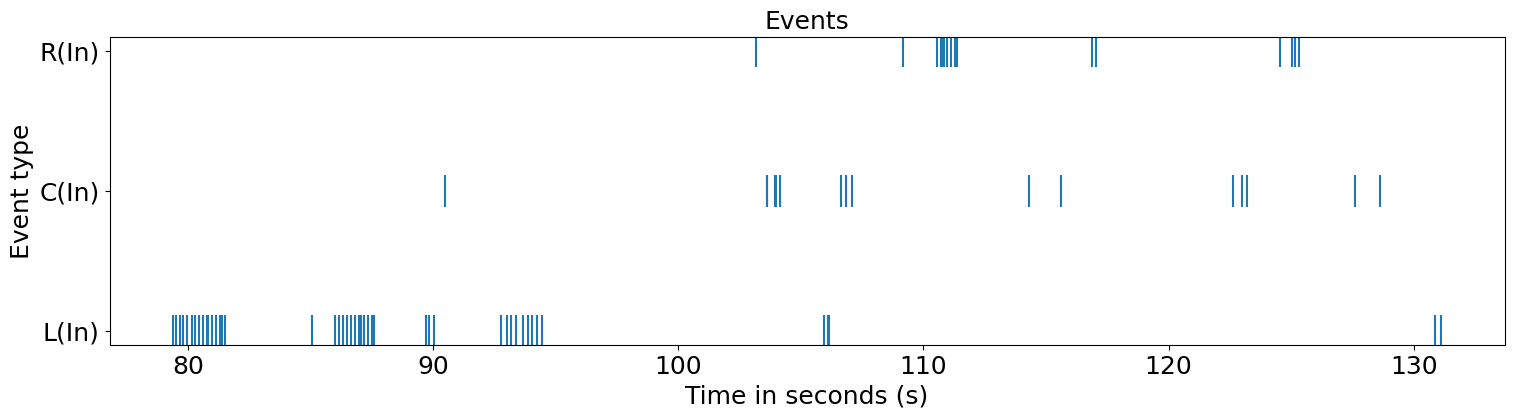

In [23]:
from matplotlib import pyplot as plt
from ndx_structured_behavior.plot import (
    plot_actions,
    plot_events,
    plot_states,
    plot_trials,
)

# Get the events from file
events = nwbfile.get_acquisition("task_recording").events
event_types = nwbfile.get_lab_meta_data("task").event_types

# Plot the data
fig = plot_events(
    events=events[20:100],
    event_types=event_types,
    show_event_values=True,
    figsize=(18,4),
    marker_size=500,
)
plt.title("Events", fontsize=18)
plt.show()

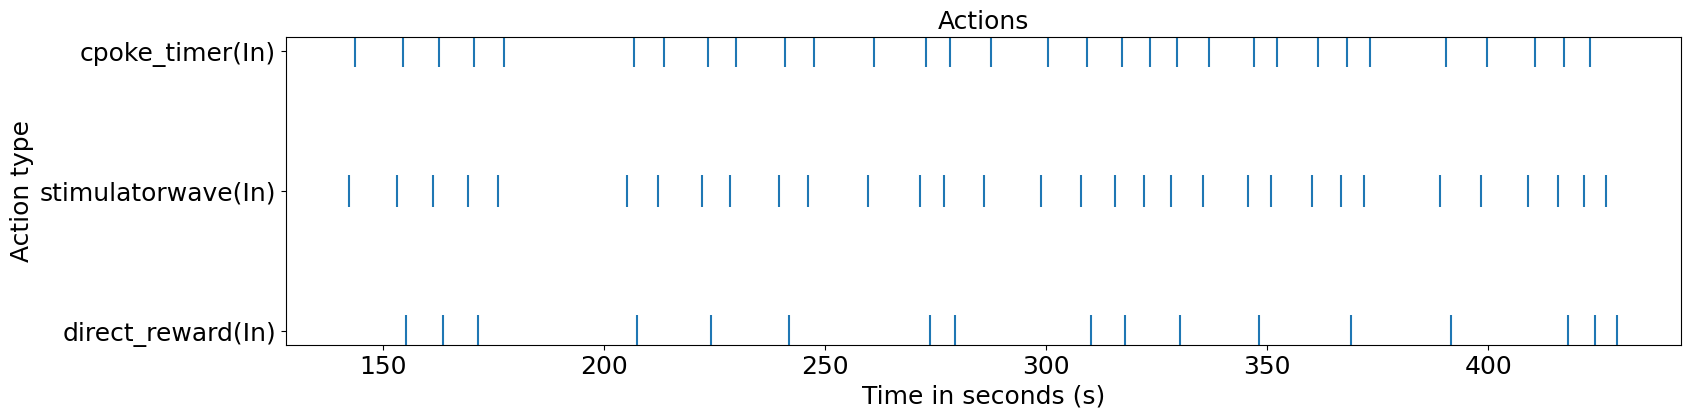

In [24]:
# Get the actions from file
actions = nwbfile.get_acquisition("task_recording").actions
action_types = nwbfile.get_lab_meta_data("task").action_types

# Plot the data
fig = plot_actions(
    actions=actions[20:100],
    action_types=action_types,
    figsize=(18,4),
    marker_size=500,
)
plt.title("Actions", fontsize=18)
plt.show()

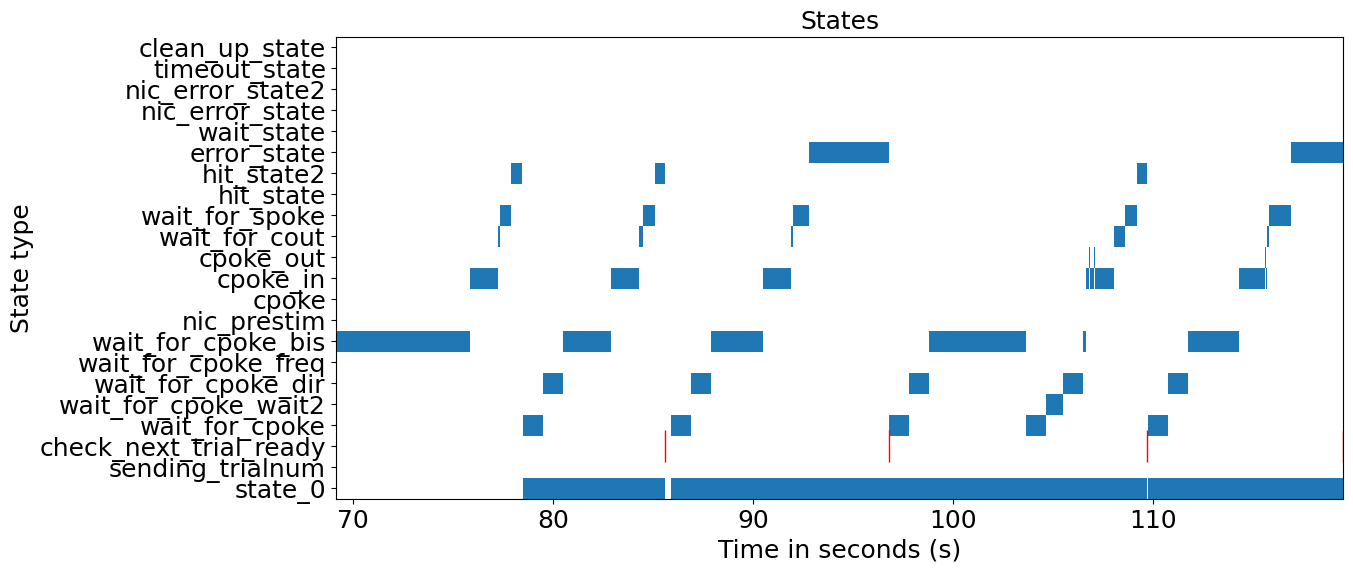

In [25]:
# Get the states from file
states = nwbfile.get_acquisition("task_recording").states
state_types = nwbfile.get_lab_meta_data("task").state_types

# Plot the data
plot_states(
    figsize=(13,6),
    states=states[20:100],
    state_types=state_types,
    marker_size=500,
)
plt.title("States", fontsize=18)
plt.show()

## Accessing the trials

The `TrialsTable` is a column-based table to store information about trials, one trial per row.
The table can be accessed from the file as `nwbfile.trials`.


In [26]:
trials = nwbfile.trials
trials[:].head()

,start_time,stop_time,states,events,actions
id,,,,,
0,32.3360,67.1255,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1]"
1,67.1256,78.4210,"[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...","[11, 12, 13, 14]","[2, 3, 4]"
2,78.4727,85.5819,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...","[5, 6, 7]"
3,85.8839,96.7632,"[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5...","[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 4...","[8, 9]"
4,96.7633,109.6879,"[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...","[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 7...","[10, 11, 12]"


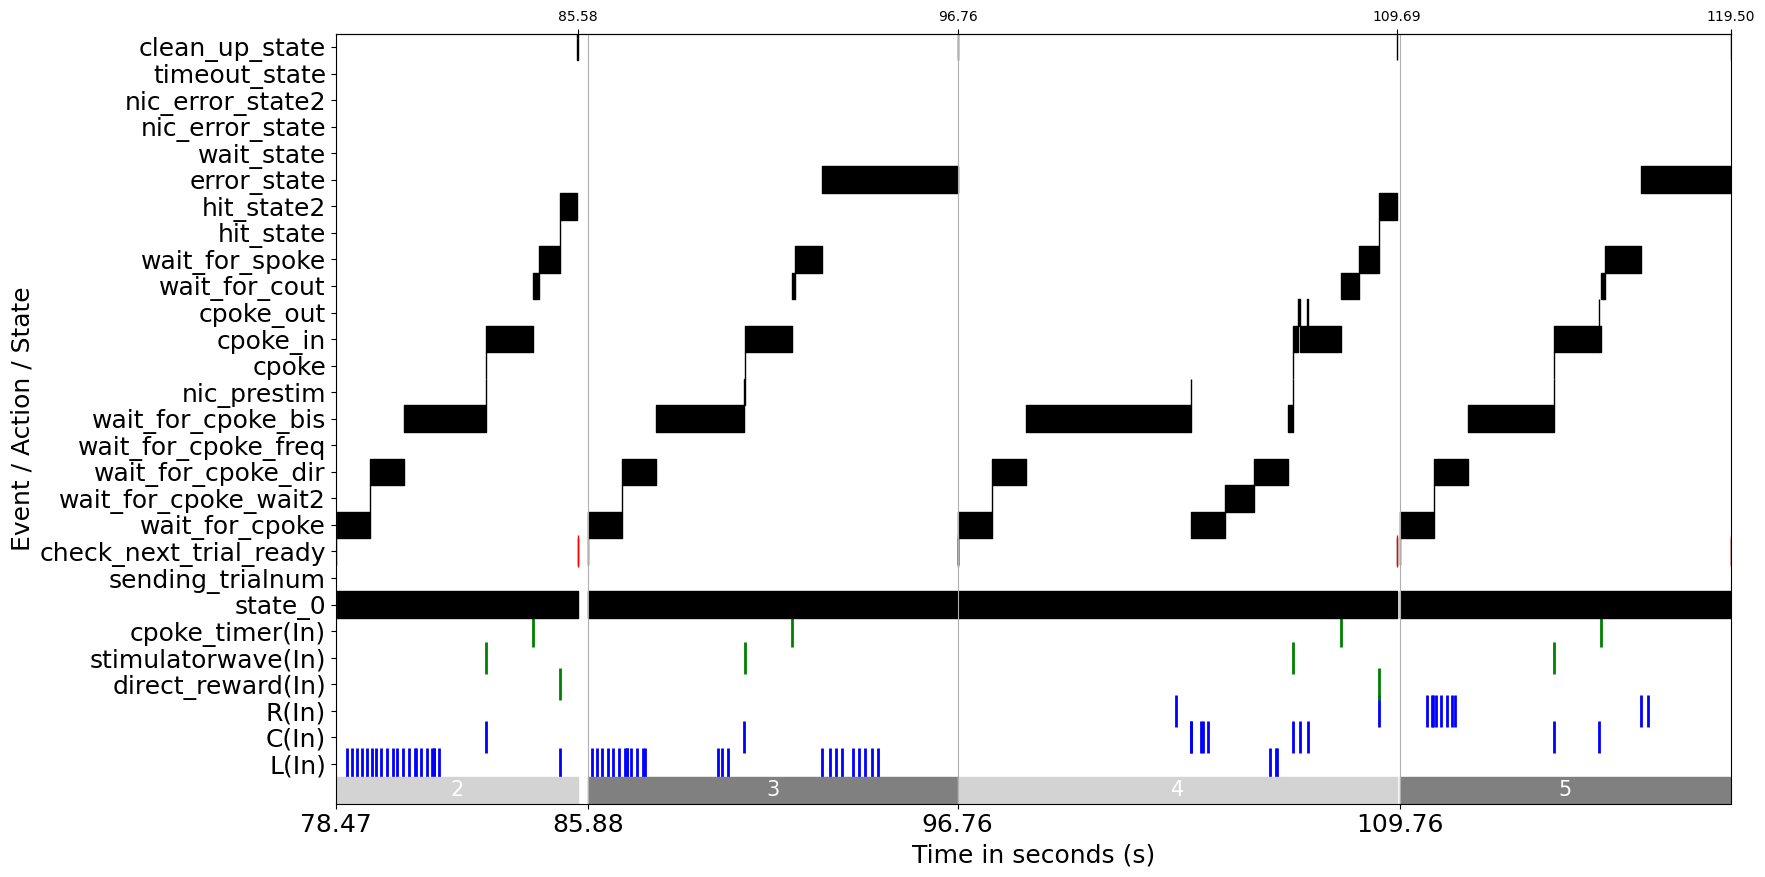

In [27]:
# Plot trial 2 - 5
plot_trials(
    trials=trials[2:6],
    states=states, state_types=state_types,
    actions=actions, action_types=action_types,
    events=events, event_types=event_types,
    figsize=None,
    fontsize=18,
    rectangle_height=1,
    marker_size=500)
plt.show()

## Compute and plot the state transition matrix

Here we compute the state transition matrix for all states throughout the experiment. However, simply by subsetting the StatesTable we can also create the transition matrix for any subset of state transitions, e.g., by selecting only the states from a subset of trials based on the TrialsTable.

In [28]:
from ndx_structured_behavior.plot import compute_state_transition_matrix

# Compute the transition count and probability matrix
state_transition_count_df, state_transition_probability_df = compute_state_transition_matrix(states=states, state_types=state_types)

display(state_transition_count_df)
display(state_transition_probability_df)


to,state_0,sending_trialnum,check_next_trial_ready,wait_for_cpoke,wait_for_cpoke_wait2,wait_for_cpoke_dir,wait_for_cpoke_freq,wait_for_cpoke_bis,nic_prestim,cpoke,...,wait_for_cout,wait_for_spoke,hit_state,hit_state2,error_state,wait_state,nic_error_state,nic_error_state2,timeout_state,clean_up_state
from,,,,,,,,,,,,,,,,,,,,,
state_0,0,0,80,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sending_trialnum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_next_trial_ready,99,0,19,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wait_for_cpoke,0,0,0,1,106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wait_for_cpoke_wait2,0,0,0,0,0,106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wait_for_cpoke_dir,0,0,0,0,0,0,0,106,0,0,...,0,0,0,0,0,0,0,0,0,0
wait_for_cpoke_freq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wait_for_cpoke_bis,0,0,0,0,0,0,0,0,106,0,...,0,0,0,0,0,0,0,0,0,0
nic_prestim,0,0,0,6,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0


to,state_0,sending_trialnum,check_next_trial_ready,wait_for_cpoke,wait_for_cpoke_wait2,wait_for_cpoke_dir,wait_for_cpoke_freq,wait_for_cpoke_bis,nic_prestim,cpoke,...,wait_for_cout,wait_for_spoke,hit_state,hit_state2,error_state,wait_state,nic_error_state,nic_error_state2,timeout_state,clean_up_state
from,,,,,,,,,,,,,,,,,,,,,
state_0,0.0,0.0,0.80000,0.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
sending_trialnum,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
check_next_trial_ready,0.5,0.0,0.09596,0.404040,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
wait_for_cpoke,0.0,0.0,0.00000,0.009346,0.990654,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
wait_for_cpoke_wait2,0.0,0.0,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
wait_for_cpoke_dir,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
wait_for_cpoke_freq,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
wait_for_cpoke_bis,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
nic_prestim,0.0,0.0,0.00000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.943396,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


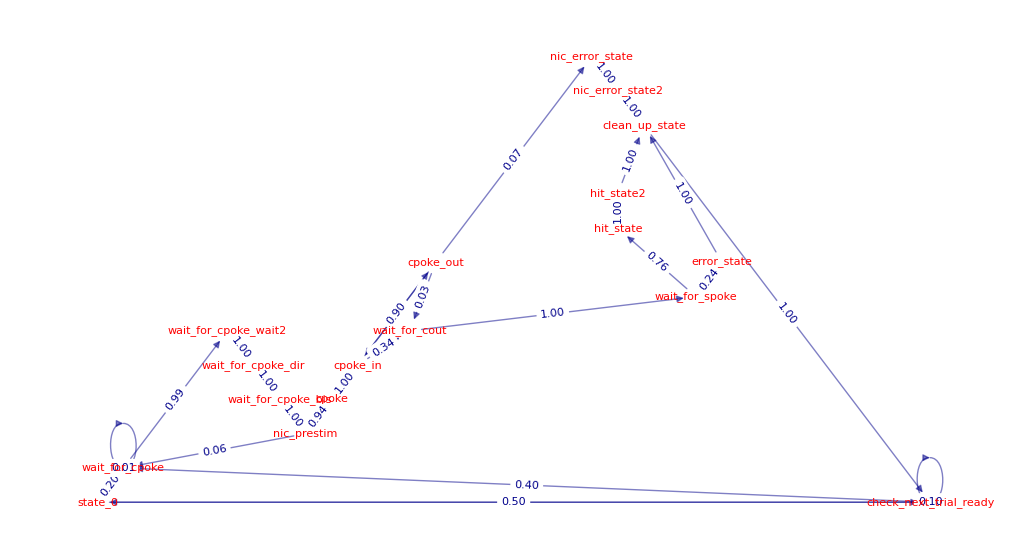

In [29]:
from ndx_structured_behavior.plot import plot_state_transition_graph

# Remove rows and columns where all values are zero
mask = (state_transition_probability_df != 0).any(axis=1)
filtered_df = state_transition_probability_df.loc[mask, state_transition_probability_df.columns[(state_transition_probability_df != 0).any(axis=0)]]

fig = plot_state_transition_graph(
    filtered_df,
    figsize=(13,7),
    edge_color='darkblue',
    edge_font_color='darkblue',
    node_font_color='red',
    fontsize=8
)
plt.show()